# 📌 Building Your First Neural Network in Python: Softmax Layer

## 🎯 Objective

In this exercise, you will implement a Softmax layer, a key component in neural networks for classification tasks. This layer applies the Softmax activation function, which transforms raw scores (logits) into probabilities, ensuring the outputs sum to 1. 

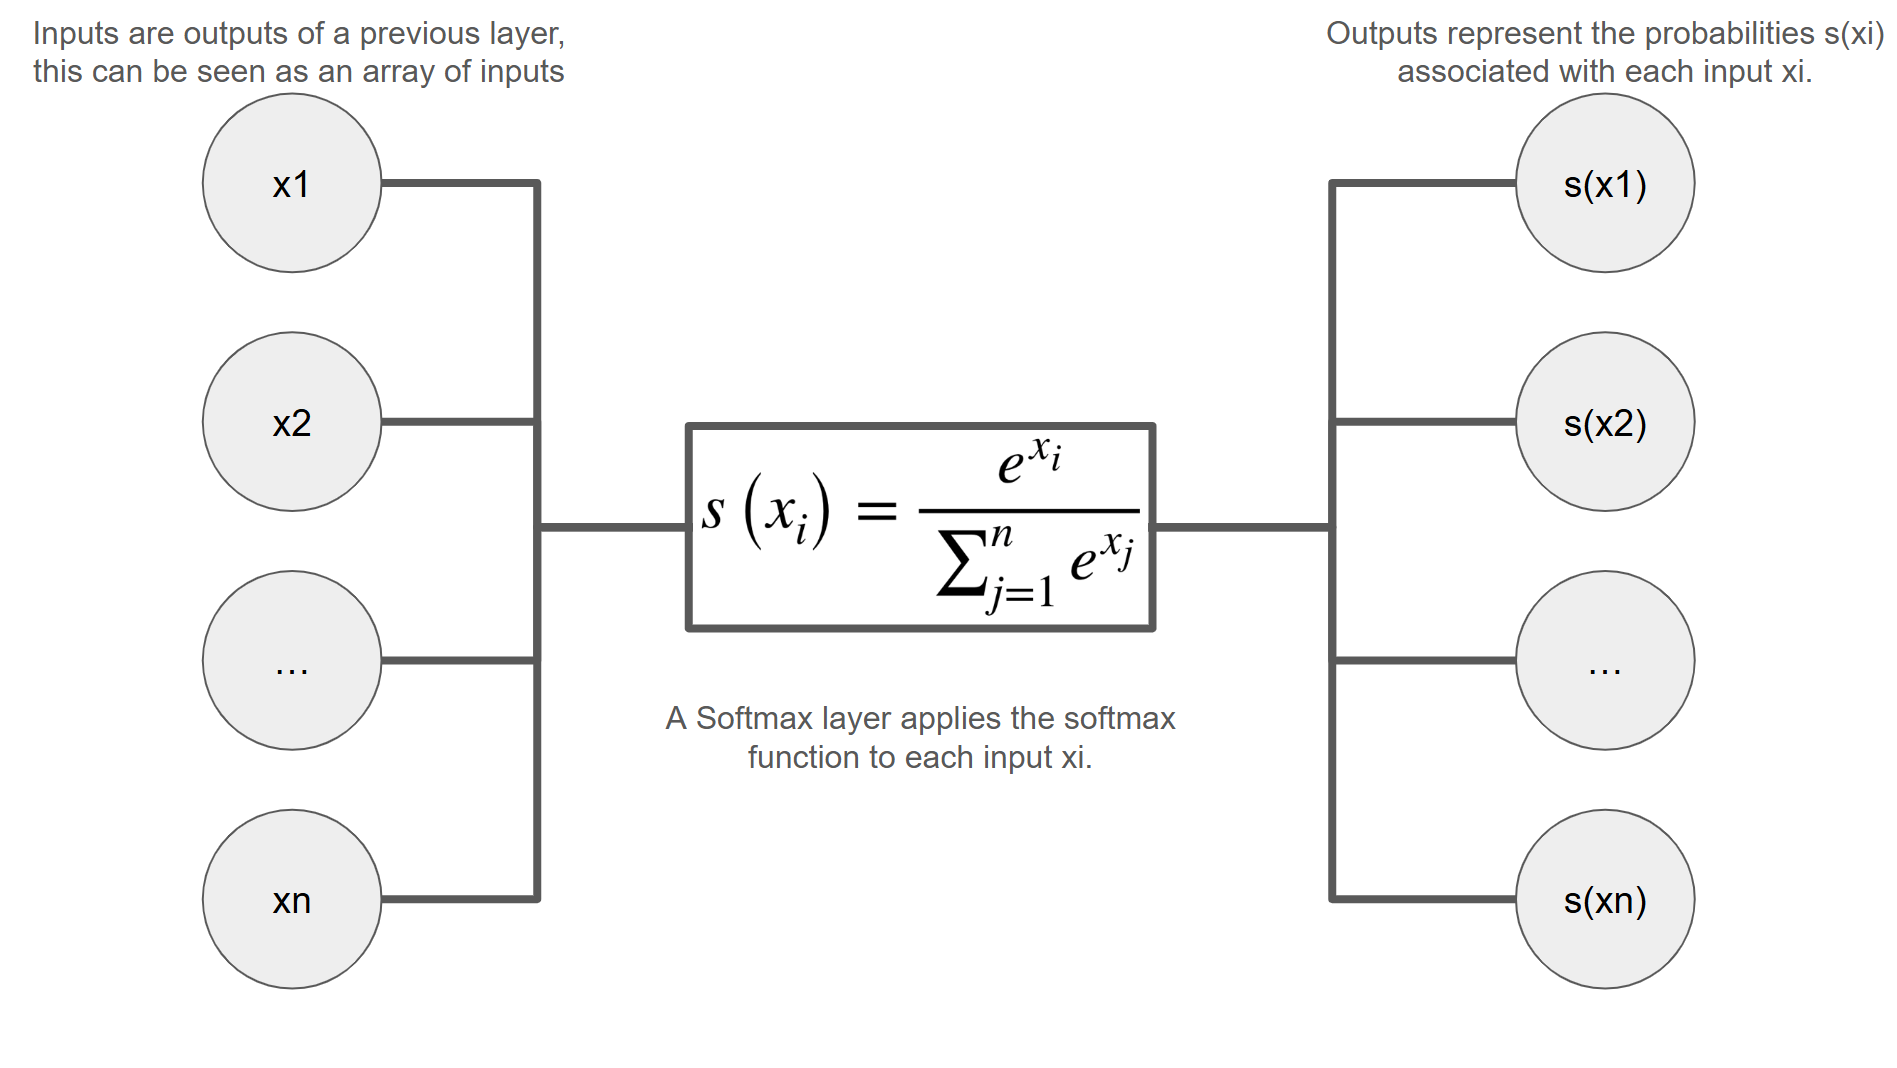

This exercise is designed to assess your understanding of activation functions, vectorized computation, and numerical stability techniques.

By completing this exercise, you will demonstrate your ability to:

✅ Implement the softmax transformation correctly.

✅ Ensure numerical stability in computations.

✅ Use efficient NumPy operations rather than loops.


## 📝 Instructions

1.  Implement the function softmax(x):
    - Input: A NumPy array x containing raw scores (logits).
    - Output: A NumPy array of the same shape, where each value represents a probability.
    - Key requirement: Your implementation should be numerically stable (preventing overflow errors).
2. Use the provided function template below to complete the implementation.
3. Run the unit tests to check if your implementation is correct.

### 📑Function Template

In [1]:
import numpy as np

def softmax(x):
    """
    Compute the softmax of vector x.

    Parameters:
        x (numpy array): Input vector

    Returns:
        numpy array: Softmax probabilities
    """
    ### START CODE HERE ###
    # Apply the softmax transformation
    # Tip: Consider numerical stability using max subtraction
    ### END CODE HERE ###


### 🔧 Unit Tests

In [ ]:
import numpy as np

def test_softmax():
    try:
        # Test 0: Check if function returns None
        test_input = np.array([2.0, 1.0, 0.1])
        output = softmax(test_input)

        if output is None:
            raise AssertionError("❌ Test 0 Failed! The function softmax() returned None. Did you forget to implement it?")

        # Test 1: Check if the return type is a NumPy array
        if not isinstance(output, np.ndarray):
            raise AssertionError(f"❌ Test 1 Failed! Expected a NumPy array, but got {type(output)} instead.")

        print("✅ Test 1 Passed: Function returns a NumPy array.")

        # Test 2: Check if output shape matches input shape
        if output.shape != test_input.shape:
            raise AssertionError(f"❌ Test 2 Failed! Expected output shape {test_input.shape}, but got {output.shape}.")

        print("✅ Test 2 Passed: Output shape matches input shape.")

        # Test 3: Basic correctness
        expected_output = np.exp(test_input - np.max(test_input)) / np.sum(np.exp(test_input - np.max(test_input)))
        assert np.allclose(output, expected_output, atol=1e-6), f"❌ Test 3 Failed! Expected {expected_output}, but got {output}."

        print("✅ Test 3 Passed: Softmax computed correctly for a simple input.")

        # Test 4: Sum of probabilities should be 1
        sum_output = np.sum(output)
        assert np.isclose(sum_output, 1.0, atol=1e-6), f"❌ Test 4 Failed! The sum of softmax output should be 1, but got {sum_output}."

        print("✅ Test 4 Passed: Softmax probabilities sum to 1.")

        # Test 5: Numerical stability check
        large_input = np.array([1000, 1000, 1000])
        stable_output = np.array([1/3, 1/3, 1/3])
        output_large = softmax(large_input)
        assert np.allclose(output_large, stable_output, atol=1e-6), f"❌ Test 5 Failed! Large values caused instability. Expected {stable_output}, but got {output_large}."

        print("✅ Test 5 Passed: Softmax handles large values correctly (numerical stability).")

        # Test 6: Handling negative values
        negative_input = np.array([-3.0, -2.0, -1.0])
        output_negative = softmax(negative_input)
        assert np.isclose(np.sum(output_negative), 1.0, atol=1e-6), f"❌ Test 6 Failed! Sum of probabilities should be 1 for negative input, but got {np.sum(output_negative)}."

        print("✅ Test 6 Passed: Softmax computed correctly for negative values.")

        print("\n🎉 All tests passed successfully!")

    except AssertionError as e:
        print(e)

# Run the test function
test_softmax()


---
### ✅ Solution: Implementing the Softmax Function

Run the solution (assuming the `test_softmax()` function is defined. If not, make sure to run the cell above first).

In [ ]:
import numpy as np

def softmax(x):
    """
    Compute the softmax of vector x in a numerically stable way.

    Parameters:
        x (numpy array): Input vector of raw scores (logits)

    Returns:
        numpy array: Softmax-transformed probabilities
    """
    exp_x = np.exp(x - np.max(x))  # Avoid overflow by subtracting max(x)
    return exp_x / np.sum(exp_x)   # Normalize to get probabilities

# Run the solution (assuming the test_softmax() function is defined. If not, make sure to run the cell above first).
test_softmax() 

### 📌 Comments on the Solution
1. Correctness

    - The solution correctly implements the softmax function by applying the exponential transformation and normalizing the output so that the sum of probabilities equals 1.

2. Numerical Stability

    - The implementation includes a crucial stability enhancement:

      ```python
      np.exp(x - np.max(x))
      ```
      This prevents potential overflow issues when dealing with large input values.
      Without this adjustment, np.exp(x) could result in inf (infinity) for large numbers, leading to incorrect results.

3. Vectorization

    - The implementation is fully vectorized using NumPy operations.
    It does not use explicit loops, making it efficient and well-suited for handling large datasets.

4. Alternative Implementations

    - While this implementation is sufficient for most applications, a log-sum-exp trick can be used for extreme numerical stability cases:

      ```python
      def softmax(x):
          log_sum_exp = np.log(np.sum(np.exp(x - np.max(x))))
          return np.exp(x - np.max(x) - log_sum_exp)
      ```

      This method ensures even greater numerical stability but is usually unnecessary unless working with highly sensitive calculations.

  ---

## 🎉 Congratulations!
In this exercise, you have successfully:

✔️ Implemented the softmax function from scratch.

✔️ Ensured numerical stability for large values.

✔️ Validated your function with comprehensive unit tests.

✔️ Applied best practices in vectorized computation using NumPy.

✅ **Next Steps:** Now that you've completed this exercise, you are ready to:

🚀 Integrate softmax into a neural network.

🔎 Explore how softmax is used in classification tasks.

💡 Experiment with different activation functions for deeper understanding.

Keep up the great work! 🎉